# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [17]:
import numpy as np

def dm (m, x):
    n = len(x)
    res = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            res[i][j] = x[i]**j
            
    return res

m = 3
M = dm(m, x)
a = np.linalg.solve(M.T @ M, M.T @ y)

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [27]:
p = []

M = dm(0, x)
a = np.linalg.solve(M.T @ M, M.T @ y)
p.append(a)
s2 = ((M @ a - y).T @ (M @ a - y)) / (len(x) - 0)
prev_s2 = s2
prev_m = 0

for m in range (1, 1000):
    M = dm(m, x)
    a = np.linalg.solve(M.T @ M, M.T @ y)
    
    p.append(a)
    s2 = ((M @ a - y).T @ (M @ a - y)) / (len(x) - m)
    if (s2 > prev_s2):
        res_m = prev_m
        break
    prev_s2 = s2
    prev_m = m
    
print(res_m - 1)

3


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

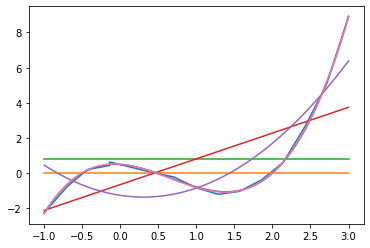

In [28]:
import matplotlib.pyplot as plt

plt.plot(x, y)

for m in range (len(p)):
    xs = np.linspace(-1, 3, 100)
    M = dm(m, xs)
    ys = M @ p[m]
    plt.plot(xs, ys)
    
#видно, что при оптимальном m интерполяция почти точно совпадает с исходным графиком

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

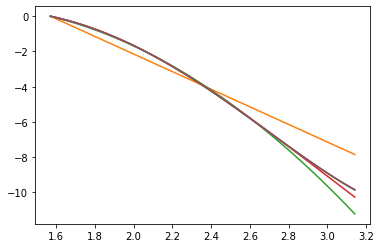

In [39]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(np.pi/2, np.pi, 100)

ys0 = []
for i in range(len(xs)):
    ys0.append(xs[i]**2 * np.cos(xs[i]))
plt.plot(xs, ys0)

for m in range(1, 6):
    ys = []
    x = []
    y = []
    for i in range(m + 1):
        x.append(np.pi/2 * (1 + (i*1.0)/(m + 1)))
        y.append(x[i]**2 * np.cos(x[i]))
    
    for i in range(len(xs)):
        ys.append(0)
        for j in range(m + 1):
            tmp = y[j]
            for k in range(m + 1):
                if (k == j):
                    continue
                tmp = tmp * (xs[i] - x[k]) / (x[j] - x[k])
            ys[i] += tmp
                
    plt.plot (xs, ys)
    

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...